In [1]:
from datasets import load_dataset
import numpy as np
import struct
from PIL import Image

## Prepare data

In [ ]:
# Set random seed
tf.random.set_seed(42)  # You can replace 42 with any integer value you prefer

In [3]:
train_file_path = '/Users/mauro.dalleluccatosi/Documents/Convergence_Analysis/datasets/tiny_imagenet/train.bin' 
val_file_path = '/Users/mauro.dalleluccatosi/Documents/Convergence_Analysis/datasets/tiny_imagenet/val.bin'  

In [4]:
classes=200
input_shape=(64,64,3)

In [5]:
def read_image_label(file):
    image_size = 64*64*3
    image = file.read(image_size)
    label = file.read(1)
    
    return image, int.from_bytes(label, byteorder='little')

In [6]:
def decode_image(image_bytes):
    # creare int array
    int_array = [int(byte) for byte in image_bytes]

    #convert int array into numpy array 
    image_np = np.array(int_array, dtype=np.uint8).reshape((64,64,3))

    return image_np

In [7]:
trainset_lenght = 100000
#trainset_lenght = 1000
train_images = []
train_labels = []

with open(train_file_path, 'rb') as file:
    for i in range(trainset_lenght):
        image, label = read_image_label(file)
        decoded_image = decode_image(image)
        train_images.append(decoded_image)
        train_labels.append(label)
    
train_labels = np.stack(train_labels)
train_images = np.stack(train_images)

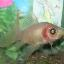

In [8]:
Image.fromarray(train_images[0])

### Normalize training image

In [9]:
scaled_train_images = train_images / 255.0

mean = np.mean(scaled_train_images, axis=(0, 1, 2))  # Calculate mean per channel
std = np.std(scaled_train_images, axis=(0, 1, 2))  # Calculate standard deviation per channel
print(mean, std)

In [10]:
mean = np.array([0.4802, 0.4481, 0.3975])
std = np.array([0.2296, 0.2263, 0.2255])

In [11]:
normalized_train_images = (scaled_train_images - mean) / (std)  # Adding a small constant to prevent division by zero

In [12]:
train_images = np.stack(normalized_train_images, axis=0)

## Load Model

In [13]:
from ResNet50_tensorflow import ResNet

In [18]:
loss = 'sparse_categorical_crossentropy'
optimizer = 'sgd'
metrics = ['accuracy']

In [19]:
model = ResNet()
model.compile(
    loss=loss, 
    optimizer=optimizer,   
    metrics=metrics   
)

## Train model

In [20]:
batch_size = 128
epochs=5

In [21]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, shuffle=True)

Epoch 1/5
782/782 [==============================] - 1962s 2s/step - loss: 9.3710 - accuracy: 0.0050
Epoch 2/5
782/782 [==============================] - 1853s 2s/step - loss: 8.2421 - accuracy: 0.0051
Epoch 3/5
782/782 [==============================] - 1870s 2s/step - loss: 7.7421 - accuracy: 0.0050
Epoch 4/5
782/782 [==============================] - 1786s 2s/step - loss: 7.5571 - accuracy: 0.0050
Epoch 5/5
782/782 [==============================] - 1849s 2s/step - loss: 7.4529 - accuracy: 0.0050
